# Global Causes of Death Data Analysis

## Project Overview
This project analyzes global causes of death over time using various data cleaning, preprocessing, and visualization techniques. The data is explored by country, year, and cause of death, with trend analysis, regional comparisons, and forecasting.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA

## Data Cleaning and Preprocessing

### 1. **Initial Inspection**
- **Loading Data**: The dataset is loaded using `pandas` for exploration.
- **Basic Info**: Displayed dataset structure with `.info()` and previewed the first few rows using `.head()`.
- **Fractions Check**: Verified that no non-integer floating point numbers were present in the data to avoid inconsistencies in analysis.
- **Missing Values**: Checked for missing values with `.isnull().sum()` to ensure completeness.
- **Duplicate Rows**: Identified duplicates using `.duplicated().sum()` to maintain data quality.
- **Descriptive Statistics**: Used `.describe()` to generate descriptive statistics for identifying outliers or anomalies.

In [2]:
# Load the dataset to examine the contents
file_path = 'cause_of_deaths.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset and the first few rows
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

(None,
   Country/Territory Code  Year  Meningitis  \
 0       Afghanistan  AFG  1990        2159   
 1       Afghanistan  AFG  1991        2218   
 2       Afghanistan  AFG  1992        2475   
 3       Afghanistan  AFG  1993        2812   
 4       Afghanistan  AFG  1994        3027   
 
    Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
 0                                     1116                  371   
 1                                     1136                  374   
 2                                     1162                  378   
 3                                     1187                  384   
 4                                     1211                  391   
 
    Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  ...  \
 0                      2087       93      1370                    1538  ...   
 1                      2153      189      1391                    2001  ...   
 2                      2441      239      1514            

In [3]:
# Check if the data has Fractions as if is it would be an error
has_fractions = df.applymap(lambda x: isinstance(x, float) and not x.is_integer()).any().any()
has_fractions

False

In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Check for duplicates
duplicate_rows = df.duplicated().sum()

# Get descriptive statistics to check for outliers or anomalies
descriptive_stats = df.describe()

missing_values, duplicate_rows, descriptive_stats

(Country/Territory                             0
 Code                                          0
 Year                                          0
 Meningitis                                    0
 Alzheimer's Disease and Other Dementias       0
 Parkinson's Disease                           0
 Nutritional Deficiencies                      0
 Malaria                                       0
 Drowning                                      0
 Interpersonal Violence                        0
 Maternal Disorders                            0
 HIV/AIDS                                      0
 Drug Use Disorders                            0
 Tuberculosis                                  0
 Cardiovascular Diseases                       0
 Lower Respiratory Infections                  0
 Neonatal Disorders                            0
 Alcohol Use Disorders                         0
 Self-harm                                     0
 Exposure to Forces of Nature                  0
 Diarrheal Diseases 

### 2. **Data Transformation**
- **Group by Year**: The dataset was grouped by the 'Year' column to compute total deaths for each cause over time.
- **Group by Country**: Summed causes of death per country for regional analysis.

In [5]:
# Group by year and sum causes of death
global_trends = df.groupby('Year').sum()
global_trends

# Sum the total deaths for each cause across all years
total_deaths_all_years = global_trends.sum().sort_values(ascending=False)
total_deaths_all_years

Cardiovascular Diseases                       447741982
Neoplasms                                     229758538
Chronic Respiratory Diseases                  104605334
Lower Respiratory Infections                   83770038
Neonatal Disorders                             76860729
Diarrheal Diseases                             66235508
Digestive Diseases                             65638635
Tuberculosis                                   45850603
Cirrhosis and Other Chronic Liver Diseases     37479321
HIV/AIDS                                       36364419
Road Injuries                                  36296469
Diabetes Mellitus                              31448872
Alzheimer's Disease and Other Dementias        29768839
Chronic Kidney Disease                         28911692
Malaria                                        25342676
Self-harm                                      23713931
Nutritional Deficiencies                       13792032
Interpersonal Violence                         1

In [6]:
# Group by Country and sum causes of death
regional_comparisons = df.drop(columns=['Year']).groupby('Country/Territory').sum()
regional_comparisons

# Get the total deaths by country
total_deaths_by_country = regional_comparisons.sum(axis=1).sort_values(ascending=False)
total_deaths_by_country

Country/Territory
China            265408106
India            238158165
United States     71197802
Russia            59591155
Indonesia         44046941
                   ...    
Cook Islands          3999
Tuvalu                2962
Nauru                 2249
Niue                   591
Tokelau                299
Length: 204, dtype: int64

## Data Visualizations

### 1. **Correlation Analysis**
- A **heatmap** was used to visualize the correlation between different causes of death. This analysis provided insights into how different causes are related to each other.

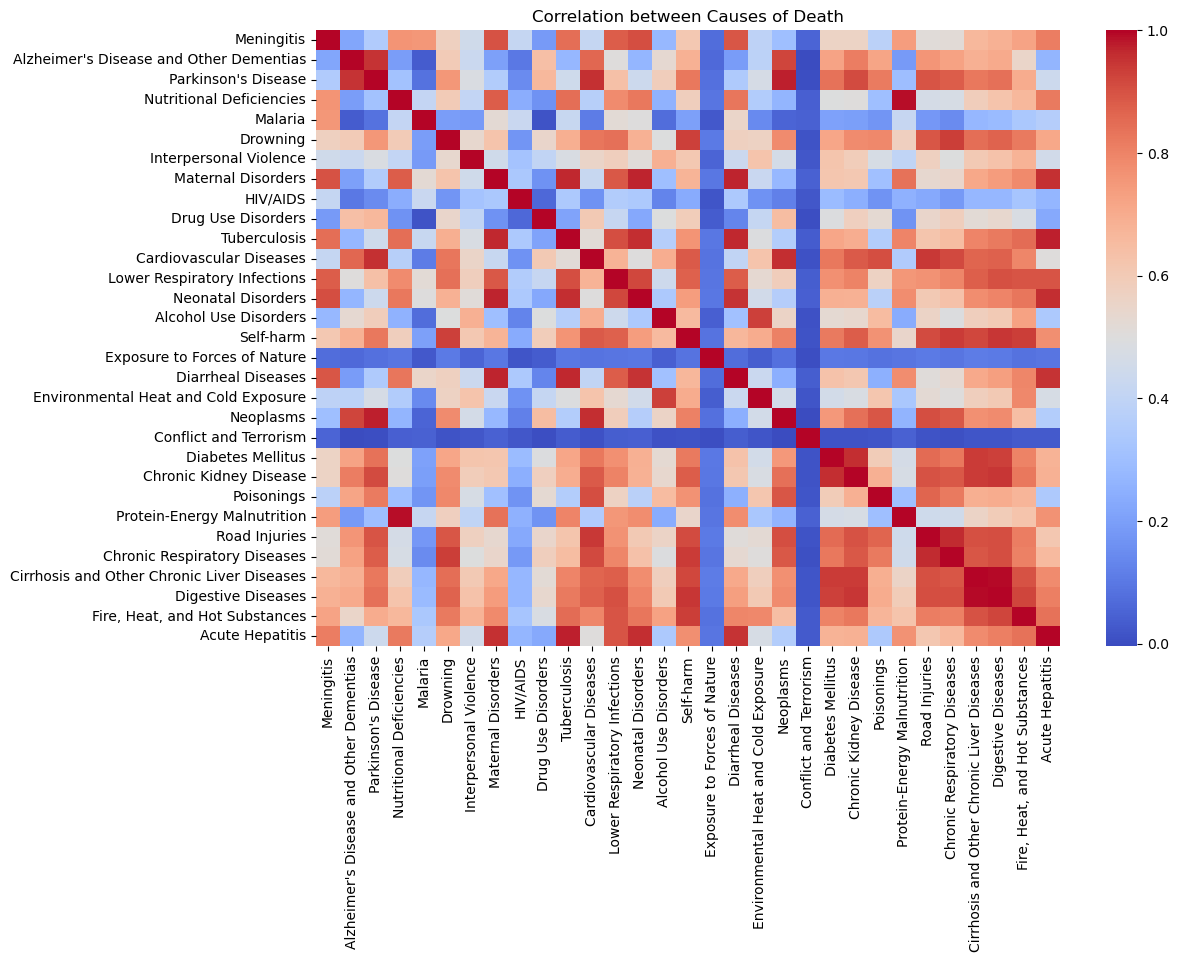

In [7]:
# Calculate correlation matrix
corr = df.iloc[:, 3:].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation between Causes of Death")
plt.show()

### 2. **Trends in Causes of Death Over Time**
- **Line** and **area charts** were created using both `matplotlib` and `seaborn` to visualize top causes of death over the years.
- A **stacked area chart** highlighted trends for the top 5 causes of death, allowing for an overview of how these causes evolved over time.

<Figure size 1200x800 with 0 Axes>

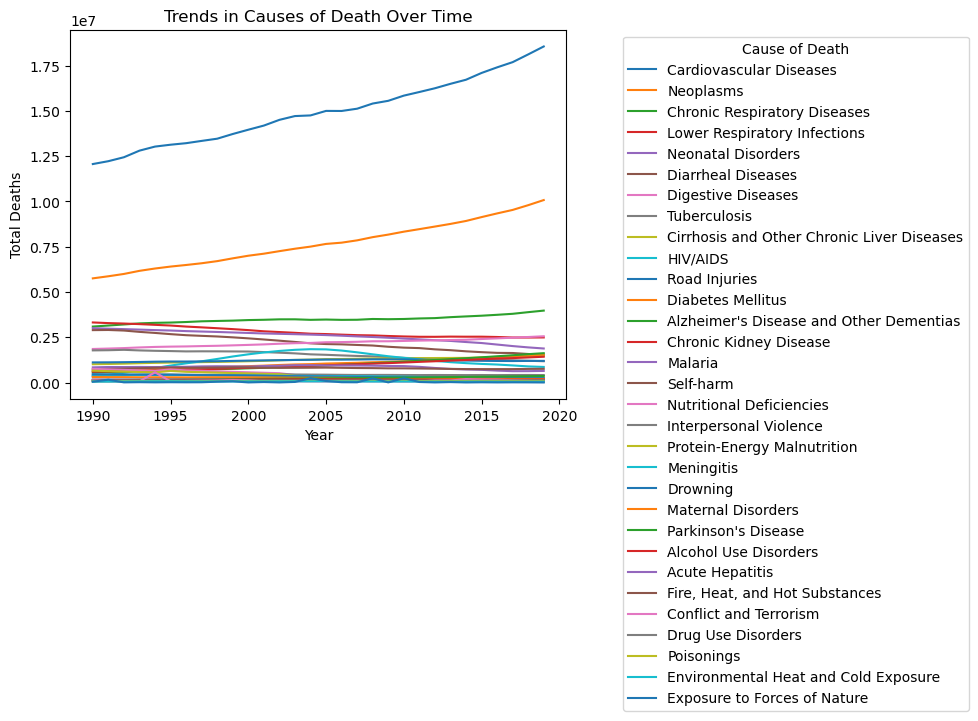

In [8]:
# Calculate total deaths for each cause
total_deaths = global_trends.sum()

# Sort causes in descending order
sorted_causes = total_deaths.sort_values(ascending=False).index

# Reorder the DataFrame columns
global_trends_sorted = global_trends[sorted_causes]

# Plot
plt.figure(figsize=(12,8))
global_trends_sorted.plot()
plt.title('Trends in Causes of Death Over Time')
plt.ylabel('Total Deaths')
plt.xlabel('Year')
plt.legend(title="Cause of Death", bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

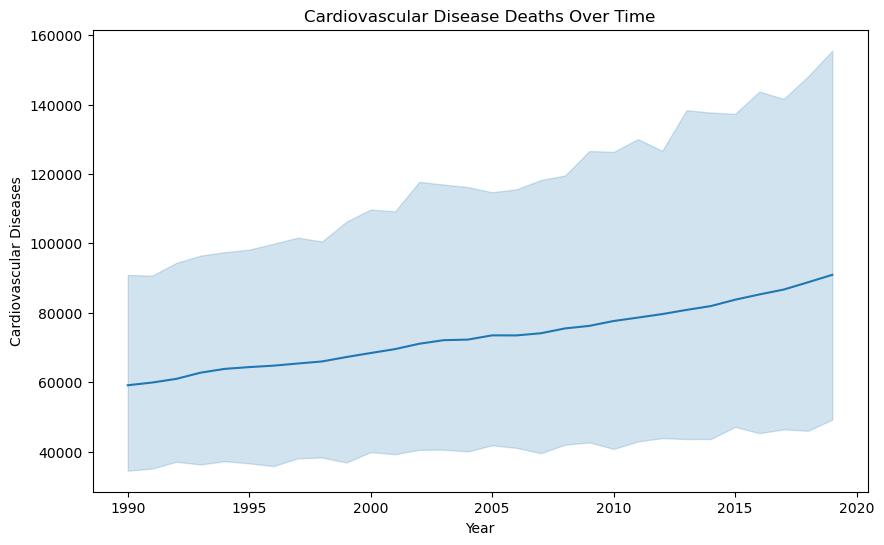

In [9]:
# Plot trends for cardiovascular diseases over the years
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Cardiovascular Diseases', data=df)
plt.title('Cardiovascular Disease Deaths Over Time')
plt.show()

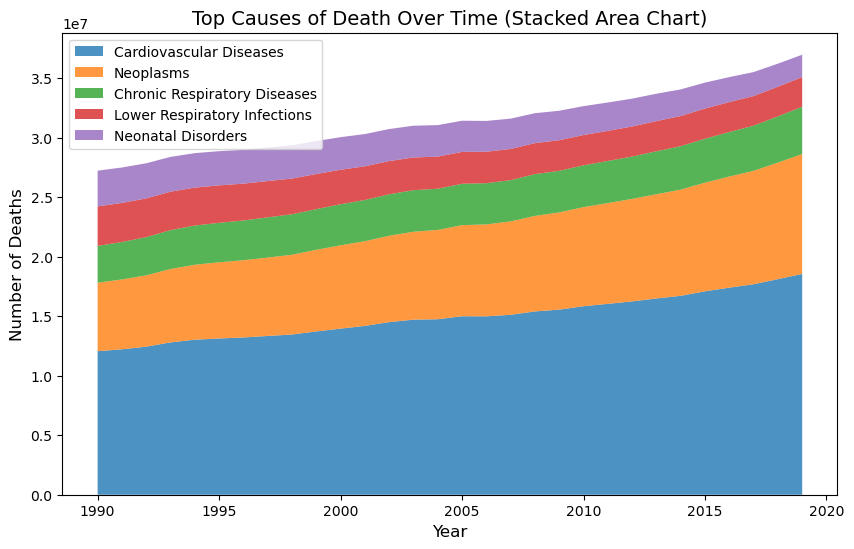

In [10]:
# Select the top 5 causes of death
top_causes = total_deaths_all_years.head(5).index.tolist()

# Plot the stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(global_trends.index, 
              [global_trends[tc] for tc in top_causes], 
              labels=top_causes, alpha=0.8)

plt.title('Top Causes of Death Over Time (Stacked Area Chart)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.legend(loc='upper left')
plt.show()

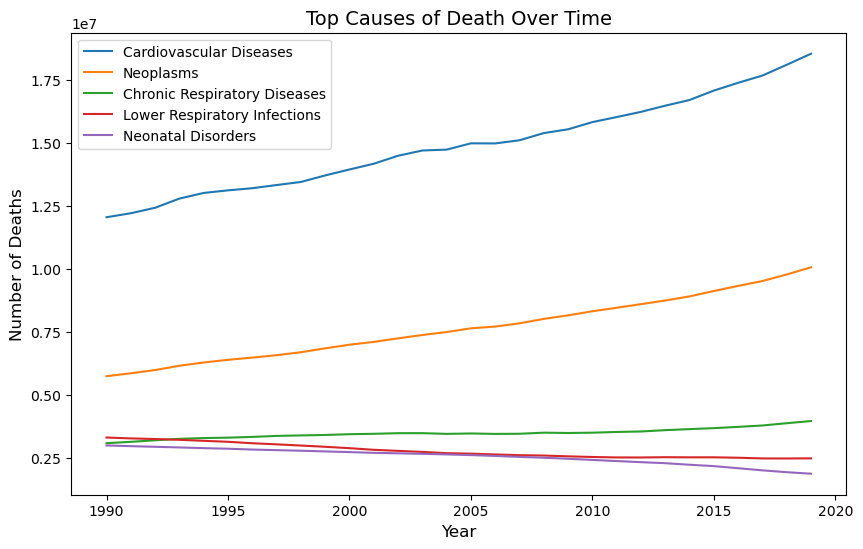

In [11]:
# Plot line chart for top causes of death
plt.figure(figsize=(10, 6))
for cause in top_causes:
    plt.plot(global_trends.index, global_trends[cause], label=cause)

plt.title('Top Causes of Death Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.legend(loc='upper left')
plt.show()

### 3. **Regional Comparisons**
- **Bar charts** and **choropleth maps** in Plotly provided insight into the distribution of deaths by cause across different countries.
- A comparative **scatter plot** showed the correlation between causes like **Malaria** and **Self-harm** in different regions.

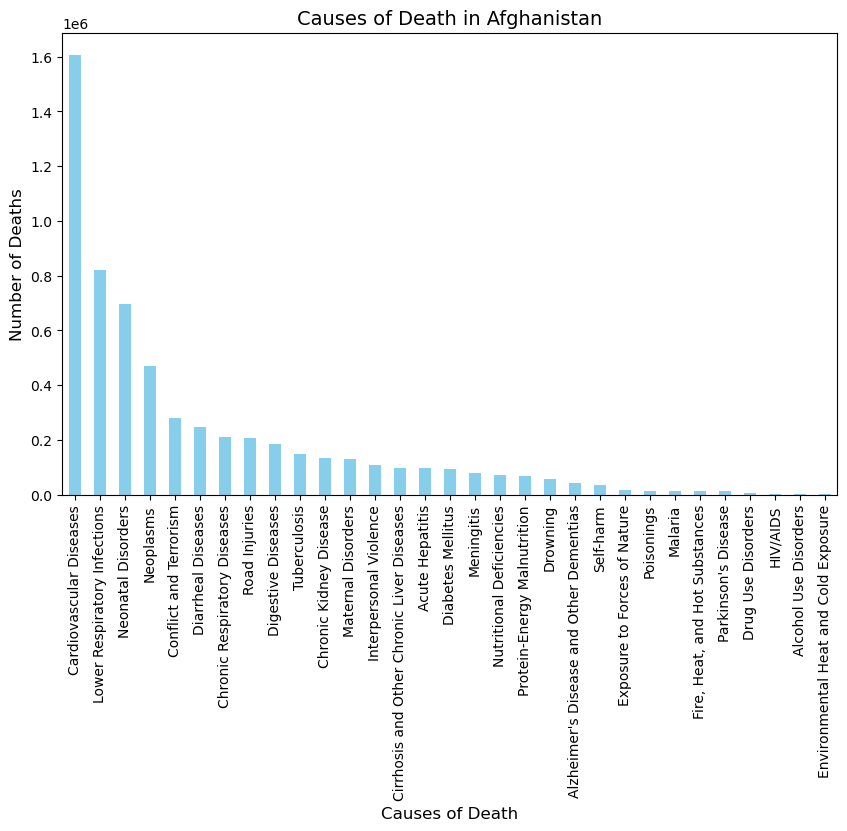

In [12]:
# Sort causes of death for Afghanistan
afghanistan_deaths = regional_comparisons.loc['Afghanistan'].sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
afghanistan_deaths.plot(kind='bar', color='skyblue')
plt.title('Causes of Death in Afghanistan', fontsize=14)
plt.xlabel('Causes of Death', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [13]:
# Create a choropleth map using Plotly
fig = px.choropleth(total_deaths_by_country.reset_index(),
                    locations='Country/Territory',
                    locationmode='country names',
                    color=total_deaths_by_country,
                    title="Total Deaths by Country")

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

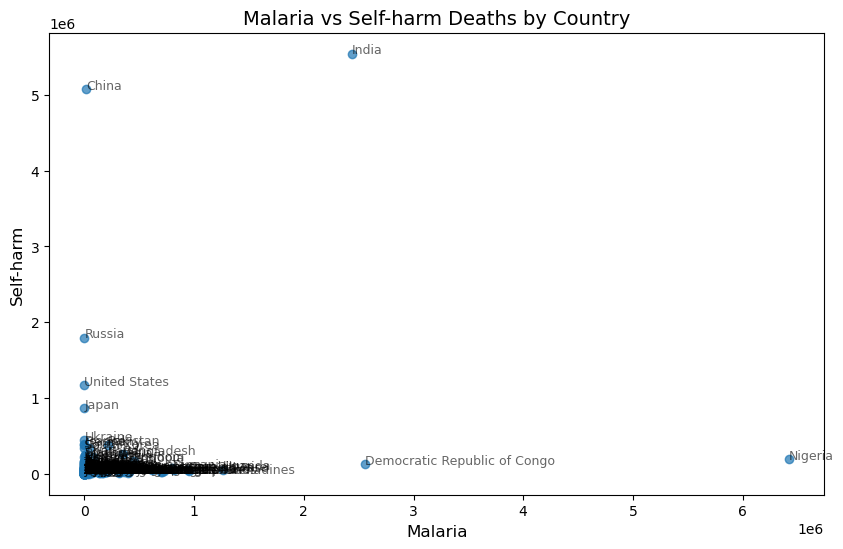

In [14]:
# Select two causes to compare
cause1 = 'Malaria'
cause2 = 'Self-harm'

# Group data by country
plt.figure(figsize=(10, 6))
plt.scatter(regional_comparisons[cause1], regional_comparisons[cause2], alpha=0.7)

plt.title(f'{cause1} vs {cause2} Deaths by Country', fontsize=14)
plt.xlabel(cause1, fontsize=12)
plt.ylabel(cause2, fontsize=12)

# Add country labels
for i, country in enumerate(regional_comparisons.index):
    plt.text(regional_comparisons[cause1][i], regional_comparisons[cause2][i], country, fontsize=9, alpha=0.6)

plt.show()

### 4. **Heatmap**
- A heatmap visualized the normalized intensity of selected causes across the years, showing how some diseases like **Diarrheal Diseases** and **Tuberculosis** have fluctuated.

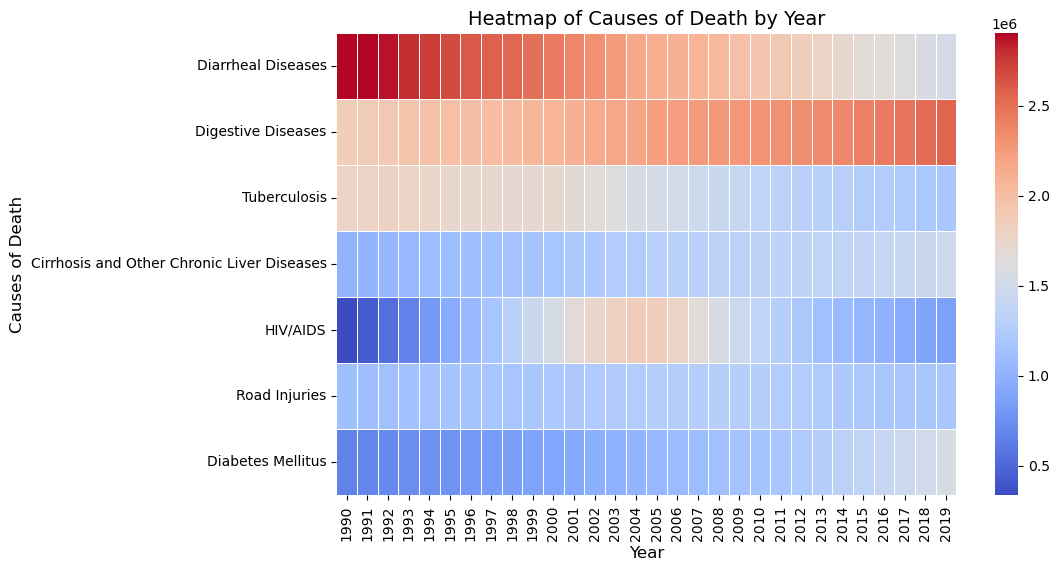

In [15]:
# Select a subset of causes to avoid overcrowding the heatmap
causes = ['Diarrheal Diseases', 'Digestive Diseases', 'Tuberculosis',
          'Cirrhosis and Other Chronic Liver Diseases', 'HIV/AIDS', 'Road Injuries', 'Diabetes Mellitus']

# Normalize data to show intensity
heatmap_data = global_trends[causes]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Heatmap of Causes of Death by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Causes of Death', fontsize=12)
plt.show()

### 5. **Facet Grid of Line Plots**
- A **facet grid of line plots** was created using Plotly to visualize trends for selected regions (e.g., China, India, United States) over time.

In [16]:
# Group by Country and Year, summing the causes of death
regional_trends = df.groupby(['Country/Territory', 'Year']).sum().reset_index()

# Melt the DataFrame to long format for Plotly
long_df = regional_trends.melt(id_vars=['Country/Territory', 'Year'], 
                               var_name='Cause of Death', value_name='Deaths')

# Here we can select the regions (countries) we want to visualize
regions = ['China', 'India', 'United States', 'Russia']

# Filter the data for the selected regions
filtered_df = long_df[long_df['Country/Territory'].isin(regions)]

# Calculate total deaths by cause of death
total_deaths_by_cause = filtered_df.groupby('Cause of Death')['Deaths'].sum()

# Sort causes of death by total deaths
sorted_causes = total_deaths_by_cause.sort_values(ascending=False).index.tolist()

# Create a facet grid of line plots with sorted legend
fig = px.line(filtered_df, 
              x='Year', y='Deaths', 
              color='Cause of Death', 
              facet_col='Country/Territory', 
              title='Trends of Causes of Death Over Time by Region',
              facet_col_wrap=2,  # Arrange into 2 columns
              labels={'Deaths': 'Number of Deaths', 'Year': 'Year'},
              category_orders={'Cause of Death': sorted_causes},  # Sort the legend by total deaths
              height=600, width=1000)

# Show the plot
fig.show()

### 6. **Forecasting** (Bonus 1)
- Used **ARIMA models** to forecast future trends for specific causes of death, such as **Cardiovascular Diseases**, predicting deaths for the next 10 years.

c:\Users\asfor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\asfor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\asfor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\asfor\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\asfor\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\asfor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index

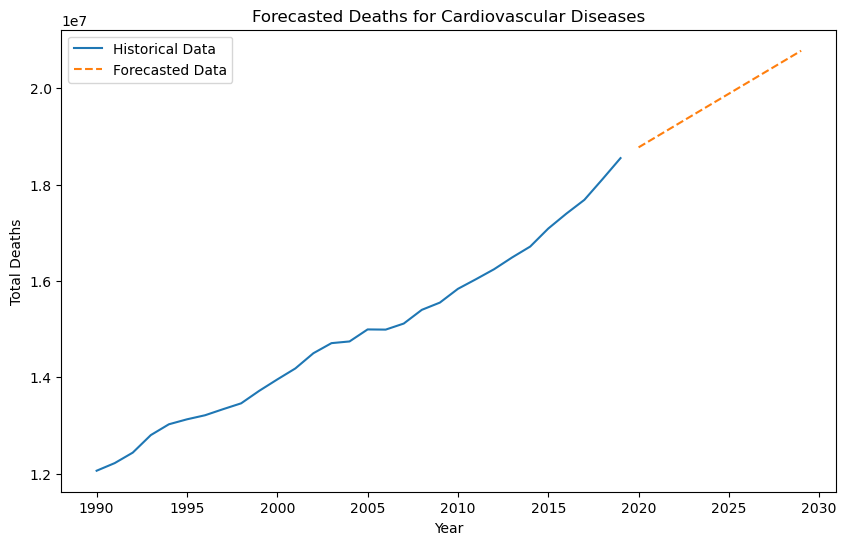

In [17]:
def forecast_deaths(global_trends, cause_of_death_column):
    # Extract the relevant column for the specified cause of death
    cause_data = global_trends[[cause_of_death_column]]
    
    # Build ARIMA model
    model = ARIMA(cause_data, order=(1, 1, 1))  # As the data is not too big we will choose lower (p,d,q) values
    model_fit = model.fit()

    # Forecast the next 10 years
    forecast = model_fit.forecast(steps=10)
    years_forecasted = np.arange(cause_data.index.max() + 1, cause_data.index.max() + 11)
    
    # Plot the forecast
    plt.figure(figsize=(10,6))
    plt.plot(cause_data.index, cause_data[cause_of_death_column], label='Historical Data')
    plt.plot(years_forecasted, forecast, label='Forecasted Data', linestyle='--')
    plt.title(f'Forecasted Deaths for {cause_of_death_column}')
    plt.xlabel('Year')
    plt.ylabel('Total Deaths')
    plt.legend()
    plt.show()

# Example usage
forecast_deaths(global_trends, 'Cardiovascular Diseases')  # We can replace this by any cause of death we want

### 7. **Animated Plot of Top Causes of Death Over Time** (Bonus 2)
- An **animated plot** was created to visualize how the top causes of death have evolved over time. This animation used Plotly to dynamically show changes in the top **5** causes.

In [18]:
df_animated = pd.DataFrame()  # Container for the new DataFrame structure
years = global_trends.index
num_years = len(years)

for i in range(1, num_years + 1):
    dfa = global_trends.head(i).copy()  # Get the subset up to the i-th year
    dfa['Year frame'] = years[i - 1]  # Frame identifier as year
    
    # Reorder columns to make 'year' the second column
    cols = dfa.columns.tolist()
    if 'Year frame' in cols:
        cols.remove('Year frame')
        cols.insert(0, 'Year frame')
        dfa = dfa[cols]
    
    df_animated = pd.concat([df_animated, dfa])

df_animated.reset_index(inplace=True)

# Determine the top 5 columns based on the latest available values
latest_values = df_animated[df_animated['Year frame'] == df_animated['Year frame'].max()].iloc[:, 2:].max().sort_values(ascending=False)
top_5_columns = latest_values.head(5).index.tolist()

# Create the animated line plot
fig = px.line(df_animated, x='Year', y=top_5_columns,
                title='Top Reasons of Death Over Time',
                labels={'Year': 'Year', 'value': 'Number of Deaths'},
                animation_frame='Year frame',  # Animation frame column
                range_x=[df_animated['Year'].min(), df_animated['Year'].max()],  # To set the x-axis range dynamically
                range_y=[0, df_animated[top_5_columns].max().max()])  # To set the y-axis range dynamically

# Show the plot
fig.show()

### 8. **Comparative Bar Charts** (Bonus 3)
- A comparison between **Egypt** and **Morocco** was plotted in a side-by-side bar chart, displaying the top causes of death in each country.

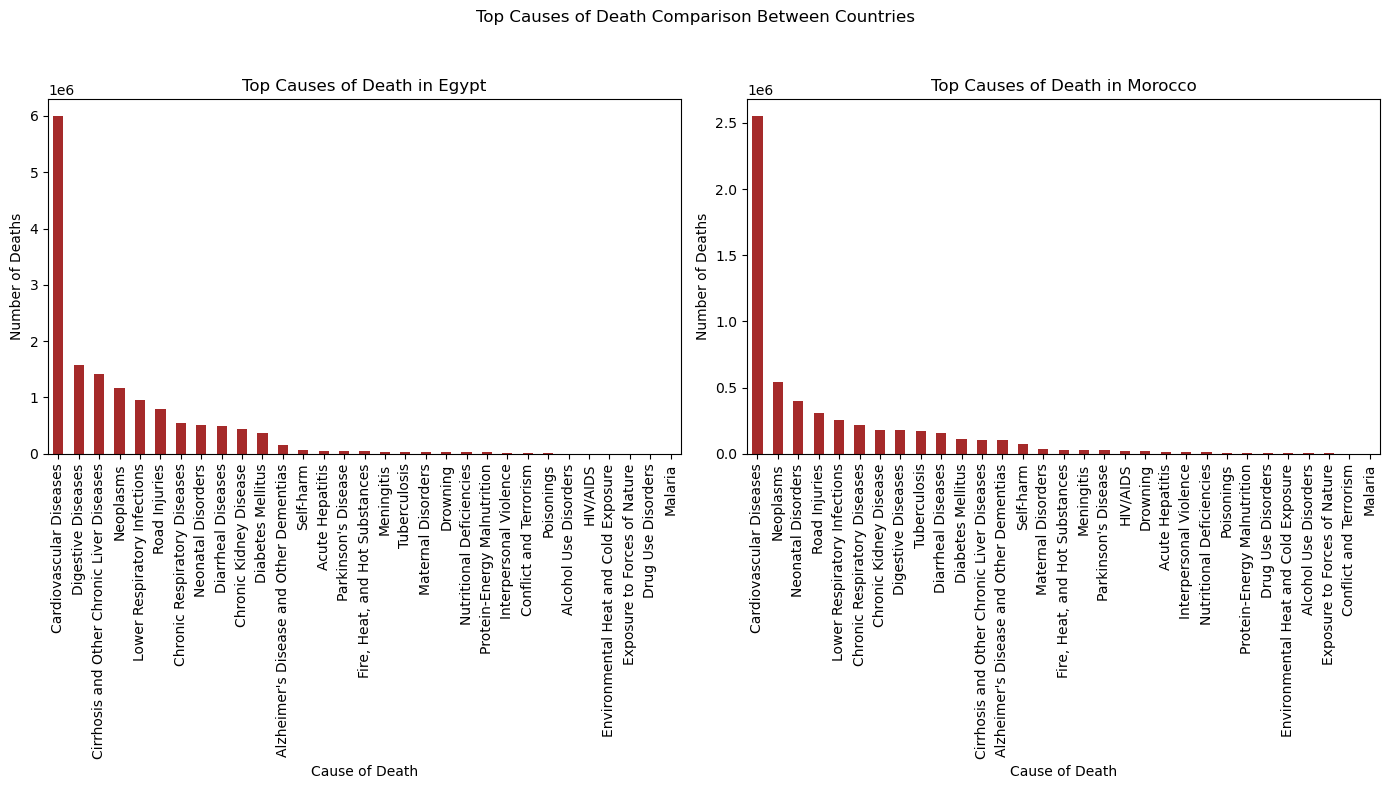

In [19]:
# Specify the countries to compare
countries = ['Egypt', 'Morocco']

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle("Top Causes of Death Comparison Between Countries")

# Plot for each country
for i, country in enumerate(countries):
    # Select the data for the country and sort it descending
    country_data = regional_comparisons.loc[country].sort_values(ascending=False)

    # Plot the data in the respective subplot
    ax = axes[i]  # Selecting the right subplot
    country_data.plot(kind='bar', ax=ax, color='brown')

    # Set the titles and labels
    ax.set_title(f"Top Causes of Death in {country}")
    ax.set_ylabel("Number of Deaths")
    ax.set_xlabel("Cause of Death")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Conclusion
This project combined data cleaning, exploration, visualization, and forecasting techniques to provide a comprehensive analysis of global causes of death. Interactive visualizations and statistical models helped in uncovering meaningful patterns and predicting future trends.